In [2]:
import utilfunctions as uf
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.dates as mdates
from matplotlib import ticker
from astropy.nddata.utils import Cutout2D

In [3]:
images_paths_QHY, images_paths_iKon, images_paths_all = uf.images_paths("Q2237+030", directory_path = "work/red")

In [3]:
coords=[203.894961420, 1.301529310]

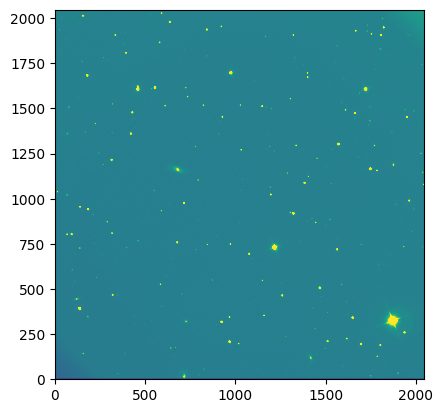

In [7]:
size = 500
with fits.open(images_paths_iKon[50], memmap=True) as hdu:
    image, w_image, header, dateob, filter, fwhms, sky,EXPT1 = uf.getinfo(hdu)
    # x1, y1 = uf.radec_to_xy(coords, [w_image])    
    # image_crop = uf.crop_images(image.get(), x1, y1, size, w_image, header)
plt.imshow(image.get(), vmin=30, vmax=1000, origin= 'lower')
# plt.plot(x1, y1, "x", mec='r', ms=15)
# len(images_paths_all)

In [38]:
import psycopg2
import os
from astropy.io import fits
import io
from astropy.wcs import WCS
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.dates as mdates
from matplotlib import ticker
from itertools import combinations

# Connect to DB
conn = psycopg2.connect(database="astrodb",
                        host="10.0.210.30",
                        user="read_only",
                        password="read_only",
                        port="5433")

In [40]:
# MODIFY these parameters (object 2)
# MODIFY these parameters
cursor = conn.cursor()
start_date = datetime.datetime(2023,1, 1,0,0,0)
end_date = datetime.datetime.now()


#starE
raE = 203.889693490   
decE = 1.299612960

#starD
raD = 203.894187770
decD = 1.297642410

#starH
raH = 203.896405720
decH = 1.307235960

#starF
raF = 203.892868870
decF = 1.291452820

#starG
raG = 203.904640090
decG = 1.302335710

#A
raA = 203.894961420  
decA = 1.301529310

#B
raB = 124.998243440
decB = 53.940423310

tolerance_small = 1/3600 # This is the tolerance to find objects in imaphot.
tolerance_big = 0.5 # This is used to pre-select relevant images on imastats. It should be approx the FOV of the images.

In [41]:
# star E
cursor = conn.cursor()
search_tuple = (raE, decE, tolerance_big, start_date, end_date, raE, decE, tolerance_small)
cursor.execute("""SELECT imaphot.imageid, imastats.dateobs, imastats.header -> 'JD-OBS' AS jdobs, imaphot.ra, imaphot.dec, imaphot.flux, imaphot.dflux, CAST(imastats.header -> 'ZP' AS real) as zp, imastats.exptime, imastats.filter FROM imaphot JOIN imastats ON imaphot.imageid = imastats.imageid WHERE imaphot.imageid IN ( SELECT imageid FROM imastats WHERE q3c_radial_query(centralra, centraldec, %s, %s, %s) AND dateobs> %s AND dateobs< %s) AND q3c_radial_query(ra, dec, %s, %s, %s);""", search_tuple)
dataE=cursor.fetchall()
dfE = pd.DataFrame(dataE)
dfE.columns = ["IMAGEID", "DATEOBS", "JD-OBS", "RAE", "DECE", "FLUX", "DFLUX", "ZP", "EXPTIME", "FILTER"]
dfE["MAG"] = dfE["ZP"]-2.5*np.log10(dfE["FLUX"]/dfE["EXPTIME"])
cursor.close()
print(len(dataE), "results.")

151 results.


In [42]:
# star D
cursor = conn.cursor()
search_tuple = (raD, decD, tolerance_big, start_date, end_date, raD, decD, tolerance_small)
cursor.execute("""SELECT imaphot.imageid, imastats.dateobs, imastats.header -> 'JD-OBS' AS jdobs, imaphot.ra, imaphot.dec, imaphot.flux, imaphot.dflux, CAST(imastats.header -> 'ZP' AS real) as zp, imastats.exptime, imastats.filter FROM imaphot JOIN imastats ON imaphot.imageid = imastats.imageid WHERE imaphot.imageid IN ( SELECT imageid FROM imastats WHERE q3c_radial_query(centralra, centraldec, %s, %s, %s) AND dateobs> %s AND dateobs< %s) AND q3c_radial_query(ra, dec, %s, %s, %s);""", search_tuple)
dataD=cursor.fetchall()
dfD = pd.DataFrame(dataD)
dfD.columns = ["IMAGEID", "DATEOBS", "JD-OBS", "RAD", "DECD", "FLUX", "DFLUX", "ZP", "EXPTIME", "FILTER"]
dfD["MAG"] = dfD["ZP"]-2.5*np.log10(dfD["FLUX"]/dfD["EXPTIME"])
cursor.close()
print(len(dataD), "results.")

145 results.


In [43]:
# star H
cursor = conn.cursor()
search_tuple = (raH, decH, tolerance_big, start_date, end_date, raH, decH, tolerance_small)
cursor.execute("""SELECT imaphot.imageid, imastats.dateobs, imastats.header -> 'JD-OBS' AS jdobs, imaphot.ra, imaphot.dec, imaphot.flux, imaphot.dflux, CAST(imastats.header -> 'ZP' AS real) as zp, imastats.exptime, imastats.filter FROM imaphot JOIN imastats ON imaphot.imageid = imastats.imageid WHERE imaphot.imageid IN ( SELECT imageid FROM imastats WHERE q3c_radial_query(centralra, centraldec, %s, %s, %s) AND dateobs> %s AND dateobs< %s) AND q3c_radial_query(ra, dec, %s, %s, %s);""", search_tuple)
dataH=cursor.fetchall()
dfH = pd.DataFrame(dataH)
dfH.columns = ["IMAGEID", "DATEOBS", "JD-OBS", "RAH", "DECH", "FLUX", "DFLUX", "ZP", "EXPTIME", "FILTER"]
dfH["MAG"] = dfH["ZP"]-2.5*np.log10(dfH["FLUX"]/dfH["EXPTIME"])
cursor.close()
print(len(dataH), "results.")

109 results.


In [44]:
# star F
cursor = conn.cursor()
search_tuple = (raF, decF, tolerance_big, start_date, end_date, raF, decF, tolerance_small)
cursor.execute("""SELECT imaphot.imageid, imastats.dateobs, imastats.header -> 'JD-OBS' AS jdobs, imaphot.ra, imaphot.dec, imaphot.flux, imaphot.dflux, CAST(imastats.header -> 'ZP' AS real) as zp, imastats.exptime, imastats.filter FROM imaphot JOIN imastats ON imaphot.imageid = imastats.imageid WHERE imaphot.imageid IN ( SELECT imageid FROM imastats WHERE q3c_radial_query(centralra, centraldec, %s, %s, %s) AND dateobs> %s AND dateobs< %s) AND q3c_radial_query(ra, dec, %s, %s, %s);""", search_tuple)
dataF=cursor.fetchall()
dfF = pd.DataFrame(dataF)
dfF.columns = ["IMAGEID", "DATEOBS", "JD-OBS", "RAF", "DECF", "FLUX", "DFLUX", "ZP", "EXPTIME", "FILTER"]
dfF["MAG"] = dfF["ZP"]-2.5*np.log10(dfF["FLUX"]/dfF["EXPTIME"])
cursor.close()
print(len(dataF), "results.")

191 results.


In [45]:
# star G
cursor = conn.cursor()
search_tuple = (raG, decG, tolerance_big, start_date, end_date, raG, decG, tolerance_small)
cursor.execute("""SELECT imaphot.imageid, imastats.dateobs, imastats.header -> 'JD-OBS' AS jdobs, imaphot.ra, imaphot.dec, imaphot.flux, imaphot.dflux, CAST(imastats.header -> 'ZP' AS real) as zp, imastats.exptime, imastats.filter FROM imaphot JOIN imastats ON imaphot.imageid = imastats.imageid WHERE imaphot.imageid IN ( SELECT imageid FROM imastats WHERE q3c_radial_query(centralra, centraldec, %s, %s, %s) AND dateobs> %s AND dateobs< %s) AND q3c_radial_query(ra, dec, %s, %s, %s);""", search_tuple)
dataG=cursor.fetchall()
dfG = pd.DataFrame(dataG)
dfG.columns = ["IMAGEID", "DATEOBS", "JD-OBS", "RAA", "DECA", "FLUX", "DFLUX", "ZP", "EXPTIME", "FILTER"]
dfG["MAG"] = dfG["ZP"]-2.5*np.log10(dfG["FLUX"]/dfG["EXPTIME"])
cursor.close()
print(len(dataG), "results.")

102 results.


In [46]:
#A
cursor = conn.cursor()
search_tuple = (raA, decA, tolerance_big, start_date, end_date, raA, decA, tolerance_small)
cursor.execute("""SELECT imaphot.imageid, imastats.dateobs, imastats.header -> 'JD-OBS' AS jdobs, imaphot.ra, imaphot.dec, imaphot.flux, imaphot.dflux, CAST(imastats.header -> 'ZP' AS real) as zp, imastats.exptime, imastats.filter FROM imaphot JOIN imastats ON imaphot.imageid = imastats.imageid WHERE imaphot.imageid IN ( SELECT imageid FROM imastats WHERE q3c_radial_query(centralra, centraldec, %s, %s, %s) AND dateobs> %s AND dateobs< %s) AND q3c_radial_query(ra, dec, %s, %s, %s);""", search_tuple)
dataA=cursor.fetchall()
dfA = pd.DataFrame(dataA)
dfA.columns = ["IMAGEID", "DATEOBS", "JD-OBS", "RAB", "DECB", "FLUX", "DFLUX", "ZP", "EXPTIME", "FILTER"]
dfA["MAG"] = dfA["ZP"]-2.5*np.log10(dfA["FLUX"]/dfA["EXPTIME"])
cursor.close()
print(len(dataA), "results.")

203 results.


In [47]:
#B
cursor = conn.cursor()
search_tuple = (raB, decB, tolerance_big, start_date, end_date, raB, decB, tolerance_small)
cursor.execute("""SELECT imaphot.imageid, imastats.dateobs, imastats.header -> 'JD-OBS' AS jdobs, imaphot.ra, imaphot.dec, imaphot.flux, imaphot.dflux, CAST(imastats.header -> 'ZP' AS real) as zp, imastats.exptime, imastats.filter FROM imaphot JOIN imastats ON imaphot.imageid = imastats.imageid WHERE imaphot.imageid IN ( SELECT imageid FROM imastats WHERE q3c_radial_query(centralra, centraldec, %s, %s, %s) AND dateobs> %s AND dateobs< %s) AND q3c_radial_query(ra, dec, %s, %s, %s);""", search_tuple)
dataB=cursor.fetchall()
dfB = pd.DataFrame(dataB)
dfB.columns = ["IMAGEID", "DATEOBS", "JD-OBS", "RA2", "DEC2", "FLUX", "DFLUX", "ZP", "EXPTIME", "FILTER"]
dfB["MAG"] = dfB["ZP"]-2.5*np.log10(dfB["FLUX"]/dfB["EXPTIME"])
cursor.close()
print(len(dataB), "results.")

32 results.


In [48]:
dfE_subset = dfE[['IMAGEID', "JD-OBS", "FILTER", 'FLUX']]
dfD_subset = dfD[['IMAGEID', "JD-OBS", "FILTER", 'FLUX']]
dfH_subset = dfH[['IMAGEID', "JD-OBS", "FILTER", 'FLUX']]
dfF_subset = dfF[['IMAGEID', "JD-OBS", "FILTER", 'FLUX']]
dfG_subset = dfG[['IMAGEID', "JD-OBS", "FILTER", 'FLUX']]
dfA_subset = dfA[['IMAGEID', "JD-OBS", "FILTER", 'FLUX']]
dfB_subset = dfB[['IMAGEID', "JD-OBS", "FILTER", 'FLUX']]

dfE_subset2 = dfE[['IMAGEID', "JD-OBS", "FILTER", "DFLUX"]]
dfD_subset2 = dfD[['IMAGEID', "JD-OBS", "FILTER", "DFLUX"]]
dfH_subset2 = dfH[['IMAGEID', "JD-OBS", "FILTER", "DFLUX"]]
dfF_subset2 = dfF[['IMAGEID', "JD-OBS", "FILTER", "DFLUX"]]
dfG_subset2 = dfG[['IMAGEID', "JD-OBS", "FILTER", "DFLUX"]]
dfA_subset2 = dfA[['IMAGEID', "JD-OBS", "FILTER", "DFLUX"]]
dfB_subset2 = dfB[['IMAGEID', "JD-OBS", "FILTER", "DFLUX"]]
#merged_df = pd.merge(df1_subset, df2_subset, on=['IMAGEID',"JD-OBS", "FILTER"], how='outer', suffixes=('star', 'comp'))
#merged_df1 = merged_df[merged_df["MAGstar"].notna()]
#merged_df2 = merged_df1[merged_df1["MAGcomp"].notna()]




dfs = [dfE_subset, dfD_subset, dfH_subset, dfF_subset, dfG_subset, dfA_subset]
dfs2 = [dfE_subset2, dfD_subset2, dfH_subset2, dfF_subset2, dfG_subset2, dfA_subset2]

merged_df = dfs[0]
errormerged_df = dfs2[0]
nom=['E', 'D', 'H', 'F', 'G', 'A']
nomc=['A', 'B']

for i, df in enumerate(dfs[1:]):
    
    merged_df = pd.merge(merged_df, df, on=['IMAGEID',"JD-OBS", "FILTER"], how='outer', suffixes=("_"+ nom[i],"_"+nom[i+1]))
    
merged_df.rename(columns={"FLUX": "FLUX_B"}, inplace=True)

for i, df in enumerate(dfs2[1:]):
    errormerged_df = pd.merge(errormerged_df, df, on=['IMAGEID',"JD-OBS", "FILTER"], how='outer', suffixes=("_"+ nom[i],"_"+nom[i+1]))
errormerged_df.rename(columns={"DFLUX": "DFLUX_B"}, inplace=True)   
    
for i in range(len(nom)):
    merged_df = merged_df[merged_df["FLUX_"+nom[i]].notna()]
    errormerged_df = errormerged_df[errormerged_df["DFLUX_"+nom[i]].notna()]
    # Adjust parameters based on your specific case
print(merged_df)
#for i in range(len(nomc)):    
merged_df = np.split(merged_df, [3, 3+len(nom)-len(nomc)], axis=1 )
errormerged_df = np.split(errormerged_df, [3, 3+len(nom)-len(nomc)], axis=1 )

stars = pd.concat([merged_df[0],merged_df[1]], axis=1)
components = pd.concat([merged_df[0],merged_df[2]], axis=1)
estars = pd.concat([errormerged_df[0],errormerged_df[1]], axis=1)
ecomponents = pd.concat([errormerged_df[0],errormerged_df[2]], axis=1)



     IMAGEID              JD-OBS  FILTER   FLUX_E   FLUX_D   FLUX_H   FLUX_F  \
0     924745   2460375.566507814   SDSSg   505.50  1345.06   214.27  4661.23   
1     924746   2460375.570259333   SDSSr  1780.98  1445.71   345.99  4732.23   
2     924747  2460375.5740110558   SDSSi  1440.15   992.23   439.97  2937.02   
7     920772   2460369.738789442   SDSSr  1903.48  1520.49  1170.45  6280.20   
17    920763   2460369.703901339   SDSSi  1829.42  1341.33  1072.15  5547.96   
..       ...                 ...     ...      ...      ...      ...      ...   
147   960912   2460404.596050373  SDSSzs  1028.91   388.14   459.17  1509.22   
148   961993  2460405.5708693154   SDSSg   848.39  1747.99   172.90  5833.86   
149   961994   2460405.574620761   SDSSr  2038.43  1659.20   550.54  5303.52   
150   961995   2460405.578372395   SDSSi  2029.58  1469.25   620.50  4144.00   
151   961996  2460405.5821238835  SDSSzs   964.37   537.50   296.00  1622.94   

      FLUX_G    FLUX_A  
0     166.82  

/home/alexmunte/.conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [49]:
unique_values = merged_df[0]["FILTER"].unique()
fluxstars = {} # Dataframes flux star per filter
errorfluxstars = {} # Dataframes error_flux star per filter
fluxcomponents = {} # Dataframes flux components per filter
errorfluxcomponents = {} # Dataframes error_flux components per filter
dateobs = {}
for i, filters in enumerate(unique_values):
    fluxstars[f"{filters}"] = stars[stars["FILTER"] == filters].drop(stars.keys()[:3], axis=1)
    errorfluxstars[f"{filters}"] = estars[estars["FILTER"] == filters].drop(stars.keys()[:3], axis=1)
    fluxcomponents[f"{filters}"] = components[components["FILTER"] == filters].drop(stars.keys()[:3], axis=1)
    errorfluxcomponents[f"{filters}"] = ecomponents[ecomponents["FILTER"] == filters].drop(stars.keys()[:3], axis=1)
    dateobs[f"{filters}"] = merged_df[0][merged_df[0]["FILTER"] == filters]["JD-OBS"]
print(unique_values) 

['SDSSg' 'SDSSr' 'SDSSi' 'SDSSzs']


In [50]:
fluxstars["Lum"]

KeyError: 'Lum'

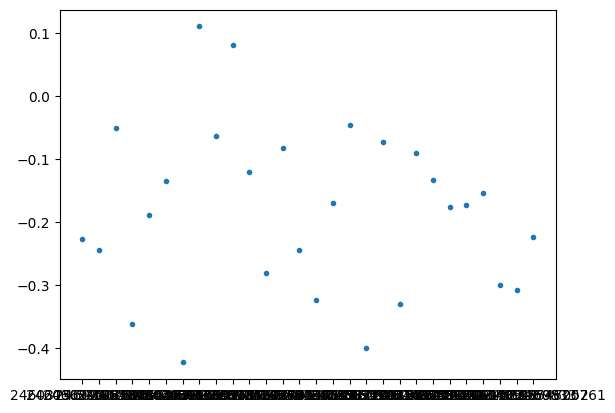

In [52]:
difmag = -2.5*(fluxstars["SDSSr"]["FLUX_E"]/fluxstars["SDSSr"]["FLUX_D"]).apply(lambda x: np.log10(x))
plt.plot(dateobs["SDSSr"],difmag,linewidth=0, marker=".")
plt.show()

In [549]:
np.array(dateobs["SDSSg"])[0]

'2460331.743272976'

In [54]:
# Function for differential photometry between stars with the flux and the dateobs in arrays
def star_diff_phot(fluxstars, dateobs, diferent_filters, starsname = False): 
    # fluxstars: array separated by filters, in each filter the flux values of each star in different arrays, for a star each value of flux corresponds to a different image.
    # dateobs: array separated by filters, each date corresponds to a different image.
    # starsname: array with names of the stars, default the stars are named with numbers.
    # diferent_filters: array with the filters
    
    if starsname == False: # Stars named with numbers
        starsname = [str(i) for i in range(len(fluxstars[diferent_filters[0]].keys()))]
    
    diff_phot = {} # Diff. phot values
    diff_phot_names = {} # Diff. phot star combinations names
    diff_phot_dates = {} # Dates for each diff. phot value
    
    for num_stars in range(1, len(starsname)): # Differential photometry using different numbers of stars like reference stars
        diff_phot[num_stars] = {} 
        diff_phot_names[num_stars] = {}
        diff_phot_dates[num_stars] = {}
                           
        for i, flux_star in enumerate(fluxstars):  # Separated for each filter
            diff_phot[num_stars]['filter_' + diferent_filters[i]] = []
            diff_phot_names[num_stars]['filter_' + diferent_filters[i]] = []
            diff_phot_dates[num_stars]['filter_' + diferent_filters[i]] = []  
            
            for j, star_flux in enumerate(fluxstars[flux_star]): # Differential photometry of one star in front of the rest
                for combo in combinations(np.delete(fluxstars[flux_star].keys(), j), num_stars): # Combinations of the stars used like reference stars
                    diffphot = -2.5 * (sum(fluxstars[flux_star][k] for k in combo) / fluxstars[flux_star][star_flux]).apply(lambda x: np.log10(x))
                    diff_phot[num_stars]['filter_' + diferent_filters[i]].append(diffphot)
                    diff_phot_names[num_stars]['filter_' + diferent_filters[i]].append(starsname[j] + ''.join(k[-1] for k in combo))
                    diff_phot_dates[num_stars]['filter_' + diferent_filters[i]].append(np.float64(dateobs[flux_star]))

    return diff_phot, diff_phot_names, diff_phot_dates

In [55]:
def error_diff_phot(fluxstars, errorfluxstars, diferent_filters, starsname = False):
    if starsname == False: # Stars named with numbers
        starsname = [str(i) for i in range(len(fluxstars[0]))]
    
    error = {}
    errordiff_phot_names = {}
    for num_stars in range(1, len(starsname)): # Differential photometry using different numbers of stars like reference stars
        error[num_stars] = {} 
        errordiff_phot_names[num_stars] = {}                  
        for i, flux_star in enumerate(fluxstars):  # Separated for each filter
            error[num_stars]['filter_' + diferent_filters[i]] = []
            errordiff_phot_names[num_stars]['filter_' + diferent_filters[i]] = []
            for j, star_flux in enumerate(fluxstars[flux_star]): # Differential photometry of one star in front of the rest
                for combo in combinations(np.delete(fluxstars[flux_star].keys(), j), num_stars): # Combinations of the stars used like reference stars
                    errordiffphot = 2.5 * np.log10(np.e) * (sum((errorfluxstars[flux_star]["D"+k]**2) for k in combo)/((sum(fluxstars[flux_star][k] for k in combo))**2) + (errorfluxstars[flux_star]["D"+star_flux]/fluxstars[flux_star][star_flux])**2).apply(lambda x: np.sqrt(x)) 
                    error[num_stars]['filter_' + diferent_filters[i]].append(errordiffphot)
                    errordiff_phot_names[num_stars]['filter_' + diferent_filters[i]].append(starsname[j] + ''.join(k[-1] for k in combo))

    return error, errordiff_phot_names 

In [56]:
for j, comp_flux in enumerate(fluxcomponents["Lum"]):
    print(j, comp_flux)

KeyError: 'Lum'

In [57]:
# Function for differential photometry between the components of the lens and the stars with the flux and the dateobs in arrays
def component_diff_phot(fluxstars, fluxcomp, dateobs, diferent_filters, starsname = False, compname = False): 
    # fluxstars: array separated by filters, in each filter the flux values of each star in different arrays, for a star each value of flux corresponds to a different image.
    # fluxcomp: array separated by filters, in each filter the flux values of each component in different arrays, for a component each value of flux corresponds to a different image.
    # dateobs: array separated by filters, each date corresponds to a different image.
    # starsname: array with names of the stars, default the stars are named with numbers.
    # compname: array with names of the components, default the components are named with numbers.
    # diferent_filters: array with the filters
    # count=0
    # count2=0
    if starsname == False: # Stars named with numbers
        starsname = [str(i) for i in range(len(fluxstars[diferent_filters[0]].keys()))]
        
    if compname == False: # Components named with numbers
        compname = [str(i) for i in range(len(fluxcomp[diferent_filters[0]].keys()))]
    
    diff_photA = {} # Diff. phot values
    diff_phot_namesA = {} # Diff. phot components and stars combinations names
    diff_phot_datesA = {} # Dates for each diff. phot value
    
    diff_photB = {} # Diff. phot values
    diff_phot_namesB = {} # Diff. phot components and stars combinations names
    diff_phot_datesB = {} # Dates for each diff. phot value
    
    for num_stars in range(1, len(starsname)+1): # Differential photometry using different numbers of stars like reference stars
        diff_photA[num_stars] = {} 
        diff_phot_namesA[num_stars] = {}
        diff_phot_datesA[num_stars] = {}
        
        diff_photB[num_stars] = {} 
        diff_phot_namesB[num_stars] = {}
        diff_phot_datesB[num_stars] = {}
                           
        for i, filters in enumerate(fluxstars):  # Separated for each filter
            diff_photA[num_stars]['filter_' + diferent_filters[i]] = []
            diff_phot_namesA[num_stars]['filter_' + diferent_filters[i]] = []
            diff_phot_datesA[num_stars]['filter_' + diferent_filters[i]] = []  
            
            diff_photB[num_stars]['filter_' + diferent_filters[i]] = []
            diff_phot_namesB[num_stars]['filter_' + diferent_filters[i]] = []
            diff_phot_datesB[num_stars]['filter_' + diferent_filters[i]] = [] 
            
            for j, comp_flux in enumerate(fluxcomp[filters]): # Differential photometry of one component in front of the stars
                for combo in combinations(fluxstars[filters].keys(), num_stars): # Combinations of the stars used like reference stars
                    if j==0:
                        diffphotA = -2.5 * (fluxcomp[filters][comp_flux] / sum(fluxstars[filters][k] for k in combo)).apply(lambda x: np.log10(x)) 
                        diff_photA[num_stars]['filter_' + diferent_filters[i]].append(np.array(diffphotA))
                        diff_phot_namesA[num_stars]['filter_' + diferent_filters[i]].append(compname[j] + ''.join(k[-1] for k in combo))
                        diff_phot_datesA[num_stars]['filter_' + diferent_filters[i]].append(np.float64(dateobs[filters]))
                        # if count==0:
                        #     print(diffphotA,np.float64(dateobs[filters]))
                        # count+=1
                    else:
                        
                        diffphotB = -2.5 * (fluxcomp[filters][comp_flux] / sum(fluxstars[filters][k] for k in combo)).apply(lambda x: np.log10(x)) 
                        diff_photB[num_stars]['filter_' + diferent_filters[i]].append(np.array(diffphotB))
                        diff_phot_namesB[num_stars]['filter_' + diferent_filters[i]].append(compname[j] + ''.join(k[-1] for k in combo))
                        diff_phot_datesB[num_stars]['filter_' + diferent_filters[i]].append(np.float64(dateobs[filters]))
                        # if count2==0:
                        #     print(diffphotB,np.float64(dateobs[filters]))
                        # count2+=1
    return diff_photA, diff_phot_namesA, diff_phot_datesA, diff_photB, diff_phot_namesB, diff_phot_datesB

In [58]:
# Function for compute the scale factors for the σ of differential photometry between components and stars
def scalefactors(fluxstars, errorfluxstars, fluxcomp, errorfluxcomp, diferent_filters, starsname = False):
    # fluxstars: array separated by filters, in each filter the flux values of each star in different arrays, for a star each value of flux corresponds to a different image.
    # fluxcomp: array separated by filters, in each filter the flux values of each component in different arrays, for a component each value of flux corresponds to a different image.
    # diferent_filters: array with the filters
    # starsname: array with names of the stars, default the stars are named with numbers.
    # compname: array with names of the components, default the components are named with numbers.
    # diferent_filters: array with the filters
    
    if starsname == False: # Stars named with numbers
        starsname = [str(i) for i in range(len(fluxstars[diferent_filters[0]].keys()))]
    
    scale_factorsA = {} # Scale factors (SF) -> σ_comp = SF * σ_stars_after_plot
    scale_factorsB = {} 
    scale_factors_namesA = {} # To know which components and which stars have been used 
    scale_factors_namesB = {}
    
    for num_stars in range(1, len(starsname)): # Number of reference stars
        scale_factorsA[num_stars] = {}
        scale_factors_namesA[num_stars] = {}
        scale_factorsB[num_stars] = {}
        scale_factors_namesB[num_stars] = {}
        
        for i, flux_star in enumerate(fluxstars): # Separated for each filter
            scale_factorsA[num_stars]['filter_' + diferent_filters[i]] = []
            scale_factors_namesA[num_stars]['filter_' + diferent_filters[i]] = []
            scale_factorsB[num_stars]['filter_' + diferent_filters[i]] = []
            scale_factors_namesB[num_stars]['filter_' + diferent_filters[i]] = []
            
            for j, comp_flux in enumerate(fluxcomp[flux_star]):
                for combo in combinations(fluxstars[flux_star].keys(), num_stars): # Implementation the sum of stars' fluxes
                    for l, s in enumerate(fluxstars[flux_star]): 
                        if s not in combo: # Stars no used in the combo to compute the σ_stars_from_flux_error needed for SF = σ_stars_from_flux_error/σ_comp_from_flux_error
                            # scale_factors[num_stars]['filter_' + diferent_filters[i]].append((fluxstars[flux_star][s] / fluxcomp[flux_star][comp_flux]) ** 2 * (
                            #             ((sum(fluxstars[flux_star][k] for k in combo))**2 * (errorfluxcomp[flux_star]["D"+comp_flux])**2 +
                            #              (fluxcomp[flux_star][comp_flux])**2 * (sum(errorfluxstars[flux_star]["D"+k] for k in combo))**2) /
                            #             (fluxstars[flux_star][s]** 2 * (sum(errorfluxstars[flux_star]["D"+k] for k in combo))**2 +
                            #              errorfluxstars[flux_star]["D"+s]** 2 * (sum(fluxstars[flux_star][k] for k in combo))**2)))
                            if j == 0: # A
                                scale_factorsA[num_stars]['filter_' + diferent_filters[i]].append((fluxstars[flux_star][s] / fluxcomp[flux_star][comp_flux]) ** 2 * (
                                        ((sum(fluxstars[flux_star][k] for k in combo))**2 * (errorfluxcomp[flux_star]["D"+comp_flux])**2 +
                                         (fluxcomp[flux_star][comp_flux])**2 * (sum(errorfluxstars[flux_star]["D"+k] for k in combo))**2) /
                                        (fluxstars[flux_star][s]** 2 * (sum(errorfluxstars[flux_star]["D"+k] for k in combo))**2 +
                                         errorfluxstars[flux_star]["D"+s]** 2 * (sum(fluxstars[flux_star][k] for k in combo))**2)))
                                scale_factors_namesA[num_stars]['filter_' + diferent_filters[i]].append("A" + starsname[l] + ''.join(k[-1] for k in combo))
                            else: # B
                                scale_factors_namesB[num_stars]['filter_' + diferent_filters[i]].append("B" + starsname[l] + ''.join(k[-1] for k in combo))   
                                scale_factorsB[num_stars]['filter_' + diferent_filters[i]].append((fluxstars[flux_star][s] / fluxcomp[flux_star][comp_flux]) ** 2 * (
                                        ((sum(fluxstars[flux_star][k] for k in combo))**2 * (errorfluxcomp[flux_star]["D"+comp_flux])**2 +
                                         (fluxcomp[flux_star][comp_flux])**2 * (sum(errorfluxstars[flux_star]["D"+k] for k in combo))**2) /
                                        (fluxstars[flux_star][s]** 2 * (sum(errorfluxstars[flux_star]["D"+k] for k in combo))**2 +
                                         errorfluxstars[flux_star]["D"+s]** 2 * (sum(fluxstars[flux_star][k] for k in combo))**2)))
    return scale_factorsA, scale_factors_namesA, scale_factorsB, scale_factors_namesB

In [59]:
compname = ["A","B"]
starsname = ["E", "D", "H", "F", "G"]
diff_phot, diff_phot_names, diff_phot_dates = star_diff_phot(fluxstars, dateobs, unique_values, starsname)
diff_phot_compA, diff_phot_names_compA, diff_phot_dates_compA, diff_phot_compB, diff_phot_names_compB, diff_phot_dates_compB = component_diff_phot(fluxstars, fluxcomponents, dateobs, unique_values, starsname, compname)
scale_factorsA, scale_factors_namesA, scale_factorsB, scale_factors_namesB = scalefactors(fluxstars, errorfluxstars, fluxcomponents, errorfluxcomponents, unique_values, starsname)
error, errordiff_phot_names = error_diff_phot(fluxstars, errorfluxstars, unique_values, starsname)

In [62]:
print(len(diff_phot_compA[1]['filter_SDSSr'][0]), len(diff_phot_dates_compA[1]['filter_SDSSr'][0]))

28 28


In [63]:
+a=[250,250,250,50]
for o, t in enumerate(diff_phot):
    figure, axis = plt.subplots(len(diff_phot[t]), len(diff_phot[t]["filter_Lum"]),figsize=(a[o], 60))
    figure.tight_layout(pad=3.5)
    for i, filtre in enumerate(diff_phot[t]):
        for j, phot in enumerate(diff_phot[t][filtre]):
        
            axis[i][j].errorbar(diff_phot_dates[t]['filter_' + unique_values[i]][j]-2460000.0, phot, yerr=np.std((phot[np.logical_not(np.isnan(phot))])), elinewidth=0.75, linewidth=0,   marker=".", label = f"σ = {np.std((phot[np.logical_not(np.isnan(phot))]))}")
            axis[i][j].legend()
            #axis[i][j].set_ylim([np.mean(group3_2[i][j][np.logical_not(np.isnan(group3_2[i][j]))])-10*np.std(group3_2[i][j][np.logical_not(np.isnan(group3_2[i][j]))]),np.mean(group3_2[i][j][np.logical_not(np.isnan(group3_2[i][j]))])+10*np.std(group3_2[i][j][np.logical_not(np.isnan(group3_2[i][j]))])])
            axis[i][j].set(xlabel='Time JD-2460000', ylabel='Phot. Diff.')
            axis[i][j].set_title("Filter "+unique_values[i]+ " star " + diff_phot_names[t]['filter_' + unique_values[i]][j][0]+ " and ref. star " + diff_phot_names[t]['filter_' + unique_values[i]][j][1:] )
    #plt.show()
    #plt.savefig('diff_phot_stars_astroDB'+str(t)+'.png')

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (1471789139.py, line 1)

In [64]:
+for o, t in enumerate(scale_factors):
    figure, axis = plt.subplots(len(scale_factors[t]), len(scale_factors[t]["filter_Lum"]),figsize=(200, 60))
    figure.tight_layout(pad=3.5)
    for i, filtre in enumerate(scale_factors[t]):
        for j, gamma in enumerate(scale_factors[t][filtre]):
            
            if t in (1,3) and j<20:
                axis[i][j].errorbar(diff_phot_dates[t]['filter_' + unique_values[i]][j]-2460000.0, gamma, yerr=np.std((gamma)), elinewidth=0.75, linewidth=0,   marker=".", label = r'$\bar{\Gamma}^2$' + f"= {np.mean(gamma)}")
            if t in (1,3) and j>=20:
                axis[i][j].errorbar(diff_phot_dates[t]['filter_' + unique_values[i]][j-20]-2460000.0, gamma, yerr=np.std((gamma)), elinewidth=0.75, linewidth=0,   marker=".", label = f"σ = {np.std(gamma)}")
            if t==2 and j<30:
                axis[i][j].errorbar(diff_phot_dates[t]['filter_' + unique_values[i]][j]-2460000.0, gamma, yerr=np.std((gamma)), elinewidth=0.75, linewidth=0,   marker=".", label = f"σ = {np.std(gamma)}")
            if t==2 and j>=30: 
                axis[i][j].errorbar(diff_phot_dates[t]['filter_' + unique_values[i]][j-30]-2460000.0, gamma, yerr=np.std((gamma)), elinewidth=0.75, linewidth=0,   marker=".", label = f"σ = {np.std(gamma)}")
            if t==4 and j<5:
                axis[i][j].errorbar(diff_phot_dates[t]['filter_' + unique_values[i]][j]-2460000.0, gamma, yerr=np.std((gamma)), elinewidth=0.75, linewidth=0,   marker=".", label = f"σ = {np.std(gamma)}")
            if t==4 and j>=5: 
                axis[i][j].errorbar(diff_phot_dates[t]['filter_' + unique_values[i]][j-5]-2460000.0, gamma, yerr=np.std((gamma)), elinewidth=0.75, linewidth=0,   marker=".", label = f"σ = {np.std(gamma)}")
            
            axis[i][j].legend()
            #axis[i][j].set_ylim([np.mean(group3_2[i][j][np.logical_not(np.isnan(group3_2[i][j]))])-10*np.std(group3_2[i][j][np.logical_not(np.isnan(group3_2[i][j]))]),np.mean(group3_2[i][j][np.logical_not(np.isnan(group3_2[i][j]))])+10*np.std(group3_2[i][j][np.logical_not(np.isnan(group3_2[i][j]))])])
            axis[i][j].set(xlabel='Time JD-2460000', ylabel='$\Gamma ^2 $')
            axis[i][j].set_title("Filter "+unique_values[i] + " comp. " + scale_factors_names[t]['filter_' + unique_values[i]][j][0] + " stars " + scale_factors_names[t]['filter_' + unique_values[i]][j][1:] )

    #plt.savefig('scale_factor_astroDB'+str(t)+'.png')

SyntaxError: invalid syntax (3133042484.py, line 1)

In [65]:
+a=[250,400,250,100]
for o, t in enumerate(scale_factors_names):
    figure, axis = plt.subplots(len(scale_factors_names[t]), len(scale_factors_names[t]["filter_Lum"]),figsize=(a[o], 60))
    figure.tight_layout(pad=3.5)
    for i, filtre in enumerate(scale_factors_names[t]):
        for j, l in enumerate(scale_factors_names[t][filtre]):
            for r, n in enumerate(diff_phot_names[t]['filter_' + unique_values[i]]):
                if n==l[1:]:
                    for g, phot in enumerate(diff_phot_comp[t]['filter_' + unique_values[i]]):
                        if l[0]==diff_phot_names_comp[t]['filter_' + unique_values[i]][g][0] and diff_phot_names_comp[t]['filter_' + unique_values[i]][g][1:]==n[1:]: 
                            # print(diff_phot_names_comp[t]['filter_' + unique_values[i]][g], n, l )
                            axis[i][j].errorbar(diff_phot_dates_comp[t]['filter_' + unique_values[i]][g]-2460000.0, phot, yerr=scale_factors[t][filtre][j]*np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))])), elinewidth=0.75, linewidth=0,   marker=".", label = f"σ = $\Gamma ^2 $ ({np.mean(scale_factors[t][filtre][j]*np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))])))}) x {np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]))}")
                            axis[i][j].legend()
                            axis[i][j].set(xlabel='Time JD-2460000', ylabel='Phot. Diff.')
                            axis[i][j].set_title("Filter "+unique_values[i] + " comp. "+ diff_phot_names_comp[t]['filter_' + unique_values[i]][g][0] + " and ref. star " + diff_phot_names_comp[t]['filter_' + unique_values[i]][g][1:] +", $\Gamma ^2 $ using"+ l +", σ_stars_"+ n )
    #plt.savefig('diff_phot_components+error_astroDB'+str(t)+'.png')

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (2737127096.py, line 1)

In [66]:
print(scale_factors_names[1]["filter_Lum"])
print(diff_phot_names[1]["filter_Lum"])
print(diff_phot_names_comp[1]["filter_Lum"])

NameError: name 'scale_factors_names' is not defined

In [67]:
for r, n in enumerate(diff_phot_names[t]['filter_' + unique_values[i]]):
    print(n)

NameError: name 't' is not defined

In [68]:
a=[250,400,250,100]
for o, t in enumerate(scale_factors_names):
    figure, axis = plt.subplots(len(scale_factors_names[t]), len(scale_factors_names[t]["filter_Lum"])/2,figsize=(a[o], 60))
    figure.tight_layout(pad=3.5)
    for i, filtre in enumerate(scale_factors_names[t]):
        for r, n in enumerate(diff_phot_names[t]['filter_' + unique_values[i]]):
            for j, l in enumerate(scale_factors_names[t][filtre]):
                if n==l[1:]:
                    for g, phot in enumerate(diff_phot_comp[t]['filter_' + unique_values[i]]):

SyntaxError: incomplete input (1189255162.py, line 9)

In [69]:
compname = ["A","B"]
starsname = ["E", "D", "H", "F", "G"]
diff_phot, diff_phot_names, diff_phot_dates = star_diff_phot(fluxstars, dateobs, unique_values, starsname)
diff_phot_compA, diff_phot_names_compA, diff_phot_dates_compA, diff_phot_compB, diff_phot_names_compB, diff_phot_dates_compB = component_diff_phot(fluxstars, fluxcomponents, dateobs, unique_values, starsname, compname)
scale_factorsA, scale_factors_namesA, scale_factorsB, scale_factors_namesB = scalefactors(fluxstars, errorfluxstars, fluxcomponents, errorfluxcomponents, unique_values, starsname)
error, errordiff_phot_names = error_diff_phot(fluxstars, errorfluxstars, unique_values, starsname)

In [70]:
import pandas as pd

def bin_flux_data_julian(flux_data, time_data_jd, bin_size_hours):
    """
    Bins flux data of stars based on time in hours using pandas with Julian Date format.

    Parameters:
        flux_data (array-like): Array containing flux data of stars.
        time_data_jd (array-like): Array containing corresponding time data in Julian Date format.
        bin_size_hours (float): Size of each bin in hours.

    Returns:
        tuple: A tuple containing binned time data and average flux values.
    """
    # Create a DataFrame with time and flux data
    df = pd.DataFrame({'Time_JD': time_data_jd, 'Flux': flux_data, 'eFlux': flux_data})
    
    # Convert Julian Date to datetime objects
    df['Time'] = pd.to_datetime(df['Time_JD'], origin='julian', unit='D')
    # print(df['Time'])
    timestamps_dt = pd.to_datetime(df['Time'])
    # Convert datetime values to numeric hours
    df['Numeric_Time'] = df['Time'].dt.hour + df['Time'].dt.minute / 60 + df['Time'].dt.second / 3600
    
    # Calculate the start time of each bin in numeric hours
    bin_start_time = timestamps_dt.dt.floor('D') + pd.to_timedelta((timestamps_dt.dt.hour // bin_size_hours) * bin_size_hours, unit='h')
    # print(bin_start_time)
    # Convert numeric hours back to datetime objects
    df['Binned_Time'] = pd.to_datetime(bin_start_time, unit='h')
    
    # Convert binned datetime values back to Julian Date format
    # df['Binned_Time_JD'] = df['Binned_Time'].apply(lambda x: x.to_julian_date())

    # Aggregate flux data within each bin and calculate the mean flux
    binned_data = df.groupby('Binned_Time')['Flux'].mean().reset_index()
    binned_time = df.groupby('Binned_Time')['Time'].mean().reset_index()
    # print(binned_time)
    # ebinned_data1 = df.groupby('Binned_Time')['eFlux']
    # for i in ebinned_data1:
    #     if len(i[1]) == 1:
    #         print(typei[1].std())
            
    ebinned_data = df.groupby('Binned_Time')['eFlux'].std().reset_index()
    # print(ebinned_data)
    ebinned_data['eFlux'] = ebinned_data['eFlux'].fillna(0)
    # for i in ebinned_data['eFlux']:
        # print(i)
    # print(type(binned_data['Binned_Time'][0]))
    # binned_data['Binned_Time'] = binned_data['Binned_Time'].apply(lambda x: x.to_julian_date())
    # print(ebinned_data)
    return binned_time['Time'].apply(lambda x: x.to_julian_date()), binned_data['Flux'], ebinned_data['eFlux']


In [71]:
def __binXY(x,y,statistic='mean',xbins=10,xrange=None):
    """
    Finds statistical value of x and y values in each x bin. 
    Returns the same type of statistic for both x and y.
    See scipy.stats.binned_statistic() for options.
    
    Parameters
    ----------
    x : array
        x values.
    y : array
        y values.
    statistic : string or callable, optional
        See documentation for scipy.stats.binned_statistic(). Default is mean.
    xbins : int or sequence of scalars, optional
        If xbins is an integer, it is the number of equal bins within xrange.
        If xbins is an array, then it is the location of xbin edges, similar
        to definitions used by np.histogram. Default is 10 bins.
        All but the last (righthand-most) bin is half-open. In other words, if 
        bins is [1, 2, 3, 4], then the first bin is [1, 2) (including 1, but 
        excluding 2) and the second [2, 3). The last bin, however, is [3, 4], 
        which includes 4.    
        
    xrange : (float, float) or [(float, float)], optional
        The lower and upper range of the bins. If not provided, range is 
        simply (x.min(), x.max()). Values outside the range are ignored.
    
    Returns
    -------
    x_stat : array
        The x statistic (e.g. mean) in each bin. 
    y_stat : array
        The y statistic (e.g. mean) in each bin.       
    n_x : array of dtype int
        The count of x values in each bin.
    n_y : array of dtype int
        The count of y values in each bin.        
        """
    x_stat, xbin_edges, binnumber = stats.binned_statistic(x, x, 
                                 statistic=statistic, bins=xbins, range=xrange)
    #print(x_stat)
    y_stat, xbin_edges, binnumber = stats.binned_statistic(x, y, 
                                 statistic=statistic, bins=xbins, range=xrange)
    n_x, xbin_edges, binnumber = stats.binned_statistic(x, x, 
                                 statistic='count', bins=xbins, range=xrange)
    n_y, xbin_edges, binnumber = stats.binned_statistic(x, y, 
                                 statistic='count', bins=xbins, range=xrange)
            
    return x_stat, y_stat, n_x, n_y

In [72]:
def __data_time_binning(data, time, mjd_ini, mjd_end, time_interval_hours, parameter, parameter_error):
    """
    Parameters
    ----------
    data: panda dataframe. Mandatory to have columns [time,parameter,parameter_error] i.e. ['MJD','MAG','eMAG']
    time: column time name 
    mjd_ini/mjd_end: MJD initial/final float
    time_interval_hours: time interval units hours float
    parameter: column parameter name to do stats string
    parameter_error: column parameter name with individual errors string
    
    
    Return
    ----------
    result_df: panda df [time+'_min', time+'_max', time+'_median',time+'std',time+'_n', parameter+'_median', parameter+'_std', parameter+'_n',time+'_central','e'+time]
    """    
    MJD_bins=int((mjd_end-mjd_ini)*24/time_interval_hours)
    
    x_median,y_median,n_x,n_y = __binXY(data[time],data[parameter],statistic='median',xbins=MJD_bins,xrange=None)
    # print(x_median,y_median,n_x,n_y)
    x_std,y_std,n_x,n_y = __binXY(data[time],data[parameter],statistic='std',xbins=MJD_bins,xrange=None)
    x_min,y_min,n_x,n_y = __binXY(data[time],data[parameter],statistic='min',xbins=MJD_bins,xrange=None)
    x_max,y_max,n_x,n_y = __binXY(data[time],data[parameter],statistic='max',xbins=MJD_bins,xrange=None)
    data_bin=pd.DataFrame({time+'_min': x_min, time+'_max': x_max, time+'_median': x_median, time+'_std': x_std, time+'_n': n_x, parameter+'_median': y_median, parameter+'_std': y_std, parameter+'_n': n_y})
    data_bin = data_bin.dropna() # dropping NaN lines
    data_bin['e'+parameter] = data_bin[parameter+'_std'] / np.sqrt(data_bin[parameter+'_n'])
    data_bin[time+'_central']=data_bin[time+'_min']+(data_bin[time+'_max']-data_bin[time+'_min'])/2
    data_bin['e'+time]=(data_bin[time+'_max']-data_bin[time+'_min'])/2
    return(data_bin)

In [73]:
# dfA = pd.DataFrame([datesA, photA, sfA*np.std(err)], columns=['MJD','MAG','eMAG'])
sfA*np.std(err)               

NameError: name 'sfA' is not defined

In [76]:
import copy
from matplotlib.ticker import MaxNLocator
import statistics as stat
from scipy import stats
a=[250,400,250,100]
for o, t in enumerate(scale_factors_namesA):
    figure, axis = plt.subplots(len(scale_factors_namesA[t]), int(len(scale_factors_namesA[t]["filter_SDSSg"])),figsize=(a[o], 60))
    figure.tight_layout(pad=3.5)
    for i, filtre in enumerate(scale_factors_namesA[t]):
        for j, l in enumerate(scale_factors_namesA[t][filtre]):
            for r, n in enumerate(diff_phot_names[t]['filter_' + unique_values[i]]):
                if n==l[1:]:
                    for g, phot in enumerate(diff_phot_compA[t]['filter_' + unique_values[i]]):
                        
                        if l[0]==diff_phot_names_compA[t]['filter_' + unique_values[i]][g][0] and  diff_phot_names_compA[t]['filter_' + unique_values[i]][g][1:]==n[1:]: 
                            # print(len(phot), len(diff_phot_dates_compA[t]['filter_' + unique_values[i]][g]), len(scale_factorsA[t][filtre][j]))
                            photA = copy.deepcopy(phot)
                            datesA = copy.deepcopy(diff_phot_dates_compA[t]['filter_' + unique_values[i]][g])
                            sfA = copy.deepcopy(scale_factorsA[t][filtre][j])
                            deletepositions=[]
                            for k in phot:
                                if k < np.quantile(phot, 0.03) or k > np.quantile(phot, 0.97):                                    
                                    deletepositions.append(np.where(phot == k)[0][0]) 

                            photA = np.delete(photA, deletepositions)
                            datesA = np.delete(diff_phot_dates_compA[t]['filter_' + unique_values[i]][g], deletepositions)
                            sfA = np.delete(scale_factorsA[t][filtre][j], deletepositions)
                            # print(len(phot2), len(datesA), len(sfA))
                            # print(deletepositions)
                            
                            photB = copy.deepcopy(diff_phot_compB[t]['filter_' + unique_values[i]][g])
                            datesB = copy.deepcopy(diff_phot_dates_compB[t]['filter_' + unique_values[i]][g])
                            sfB = copy.deepcopy(scale_factorsB[t][filtre][j])
                            
                            deletepositions2=[]
                            for k in diff_phot_compB[t]['filter_' + unique_values[i]][g]:
                                if k < np.quantile(diff_phot_compB[t]['filter_' + unique_values[i]][g], 0.03) or k > np.quantile(diff_phot_compB[t]['filter_' + unique_values[i]][g], 0.97):     
                                    deletepositions2.append(np.where(diff_phot_compB[t]['filter_' + unique_values[i]][g] == k)[0][0]) 
                            photB = np.delete(photB, deletepositions2)
                            datesB = np.delete(datesB, deletepositions2)     
                            sfB = np.delete(sfB, deletepositions2)  
                            
                            # print(len(sfA),len(sfB))
                            
                            deletepositions3=[]
                            for u, x in enumerate(sfA):
                                if x > (stat.mode(sfA)+stat.mode(sfA)/2):# or x < (stat.mode(sfA)-stat.mode(sfA)/2):
                                    deletepositions3.append(u)
                            photA = np.delete(photA, deletepositions3)
                            datesA = np.delete(datesA, deletepositions3)
                            sfA = np.delete(sfA, deletepositions3)
                            
                            deletepositions4=[]
                            for u, x in enumerate(sfB):
                                if x > (stat.mode(sfB)+stat.mode(sfB)/2):# or x < (stat.mode(sfB)-stat.mode(sfB)):
                                    deletepositions4.append(u)
                            photB = np.delete(photB, deletepositions4)
                            datesB = np.delete(datesB, deletepositions4)
                            sfB = np.delete(sfB, deletepositions4)
                            #if g==0:
                                #print(len(datesA))
                                #print(datesA)
                            
                            #datetime_datesA = pd.to_datetime(datesA, origin="julian", unit="D")
                            #datetime_datesB = pd.to_datetime(datesB, origin="julian", unit="D")
                            #if g==0:
                                #print(len(datetime_datesA))
                                #print(datetime_datesA)
                            err=diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]
                            deletepositions3=[]
                            for k in diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]:
                                if k < np.quantile(err, 0.1) or k > np.quantile(err, 0.9):     
                                    deletepositions3.append(np.where(err == k)[0][0]) 
                            err = np.delete(err, deletepositions3)
                            # datesB = np.delete(datesB, deletepositions2)     
                            # sfB = np.delete(sfB, deletepositions2)
                            #if filtre!="Lum":
                            lista3= zip(datesA, photA, sfA*np.std(err))
                            lista4= zip(datesB, photB, sfB*np.std(err))
                            dfA = pd.DataFrame(lista3, columns=['MJD','MAG','eMAG'])
                            dfB = pd.DataFrame(lista4, columns=['MJD','MAG','eMAG'])
                                #print(dfA)
                                
                            data_binA = __data_time_binning(data=dfA, time='MJD', mjd_ini=min(datesA), mjd_end=max(datesA), time_interval_hours=24.0, parameter='MAG', parameter_error='eMAG')
                            data_binB = __data_time_binning(data=dfB, time='MJD', mjd_ini=min(datesB), mjd_end=max(datesB), time_interval_hours=24.0, parameter='MAG', parameter_error='eMAG')
                            #print("aqui",data_binA)
                            #print(data_binB)
                            datesA2, photA2, ephotA2 = bin_flux_data_julian(photA, datesA, 24)
                            datesB2, photB2, ephotB2 = bin_flux_data_julian(photB, datesB, 24)
                            datesA3, sfA2, ee = bin_flux_data_julian(sfA, datesA, 24)
                            datesB3, sfB2, ee = bin_flux_data_julian(sfB, datesB, 24)
                            #if g==0:
                            # print(ephotA2)  
                            for q,w in enumerate(ephotA2):
                                if w==0:
                                    ephotA2[q]=sfA2[q]*np.std((err))
                            for q,w in enumerate(ephotB2):
                                if w==0:
                                    ephotB2[q]=sfB2[q]*np.std((err))  
                            
                                #print(datesA2, datesA) sfA2*np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]))
                            axis[i][j].errorbar((datesA)-2460000.0, photA, yerr=sfA*np.std((err)), elinewidth=0.75, linewidth=0,   marker=".", label = f"Component A ($σA _i = \Gamma ^{2}_i $ x {np.std((err))})") # ({np.mean(sfA)})*np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]))
                            axis[i][j].errorbar((datesB)-2460000.0, photB, yerr=sfB*np.std((err)), elinewidth=0.75, linewidth=0,   marker=".", label = f"Component B ($σB _i = \Gamma ^{2}_i $ x {np.std((err))})") #({np.mean(sfB)})*np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]))
                            #axis[i][j].errorbar((datesA2)-2460000.0, photA2, yerr=ephotA2, elinewidth=0.75, linewidth=0,   marker=".",mfc="black",mec="black", ecolor="black")#, label = f"$σA _i = \Gamma ^{2}_i $ x {np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]))}") # ({np.mean(sfA)})*np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]))
                            #axis[i][j].errorbar((datesB2)-2460000.0, photB2, yerr=ephotB2, elinewidth=0.75, linewidth=0,   marker=".",mfc="black",mec="black", ecolor="black")#, label = f"$σB _i = \Gamma ^{2}_i $ x {np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]))}") #({np.mean(sfB)})*np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]))
                            axis[i][j].errorbar((data_binA["MJD_central"])-2460000.0, data_binA["MAG_median"], xerr=data_binA["eMJD"], yerr=data_binA["eMAG"], elinewidth=0.75, linewidth=0,   marker=".", mfc="black",mec="black", ecolor="black")#, label = f"$σA _i = \Gamma ^{2}_i $ x {np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]))}") # ({np.mean(sfA)})*np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]))
                            axis[i][j].errorbar((data_binB["MJD_central"])-2460000.0, data_binB["MAG_median"], xerr=data_binB["eMJD"], yerr=data_binB["eMAG"], elinewidth=0.75, linewidth=0,   marker=".", mfc="black",mec="black", ecolor="black")
                            # axis[i][j].errorbar(datesA2-2460000.0, photA2, yerr=np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))])), elinewidth=0.75, linewidth=0,   marker=".", label = f"$σA _i = \Gamma ^{2}_i $ x {np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]))}") # ({np.mean(sfA)})*np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]))
                            # axis[i][j].errorbar(datesB2-2460000.0, photB2, yerr=np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))])), elinewidth=0.75, linewidth=0,   marker=".", label = f"$σB _i = \Gamma ^{2}_i $ x {np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]))}") #({np.mean(sfB)})*np.std((diff_phot[t][filtre][r][np.logical_not(np.isnan(diff_phot[t][filtre][r]))]))
                            # axis[i][j].set_xticks((round(min(datesA)), round(max(datesA))) 5)
                            axis[i][j].locator_params(axis='x', nbins=50)
                            # axis[i][j].set_ylim([min(photA)-0.1*min(photA), max(photB)+0.1*max(photB)])
                            axis[i][j].legend()
                            axis[i][j].set(xlabel='Time JD-2460000', ylabel='Phot. Diff.')
                            axis[i][j].set_title("Filter "+unique_values[i] + " comp. "+ diff_phot_names_compA[t]['filter_' + unique_values[i]][g][0]+ " and " + diff_phot_names_compB[t]['filter_' + unique_values[i]][g][0]+ " and ref. star " + diff_phot_names_compA[t]['filter_' + unique_values[i]][g][1:] +", $\Gamma ^2 $ using "+ l+ " and "+ (scale_factors_namesB[t][filtre][j]) +", σ_stars_"+ n )
    
    plt.savefig('diff_phot_components_error_binning'+str(t)+'.jpeg')
    

ValueError: Number of columns must be a positive integer, not 0

<Figure size 10000x6000 with 0 Axes>

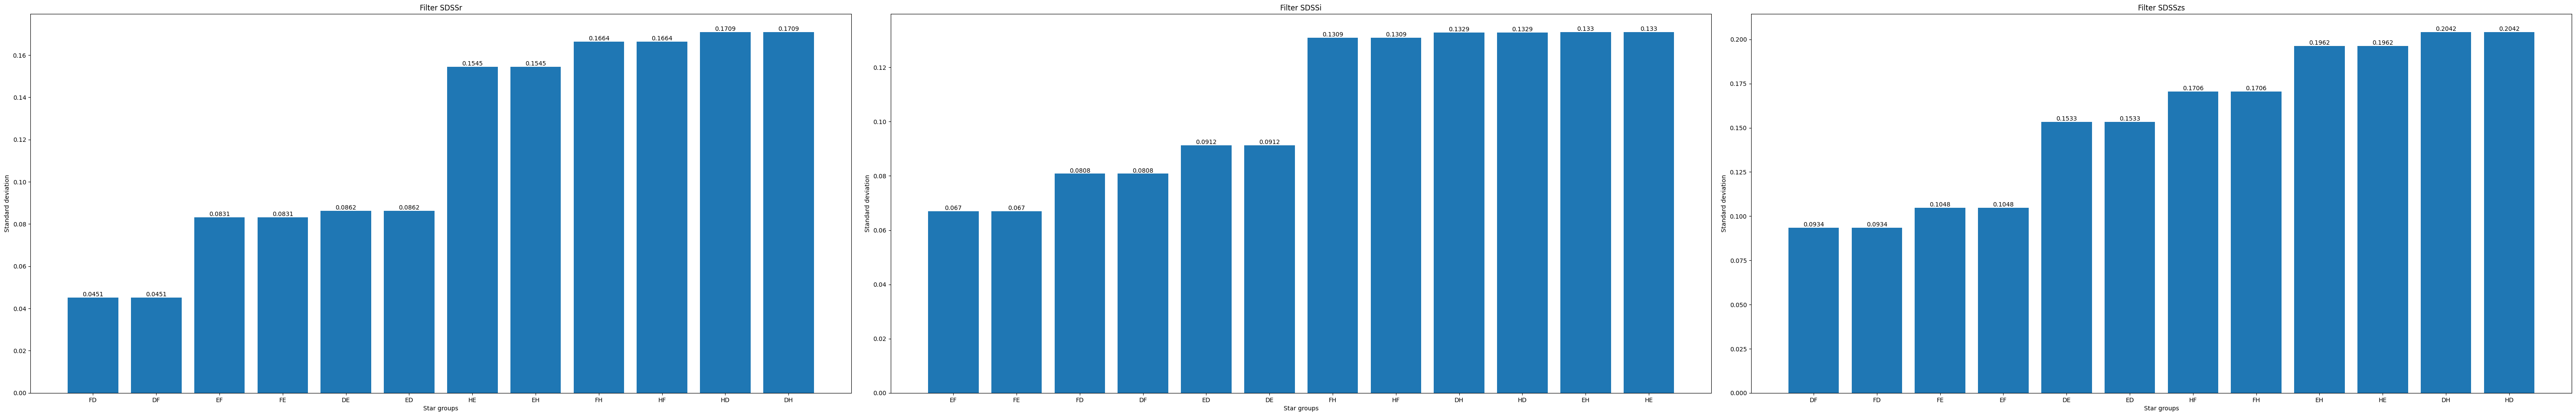

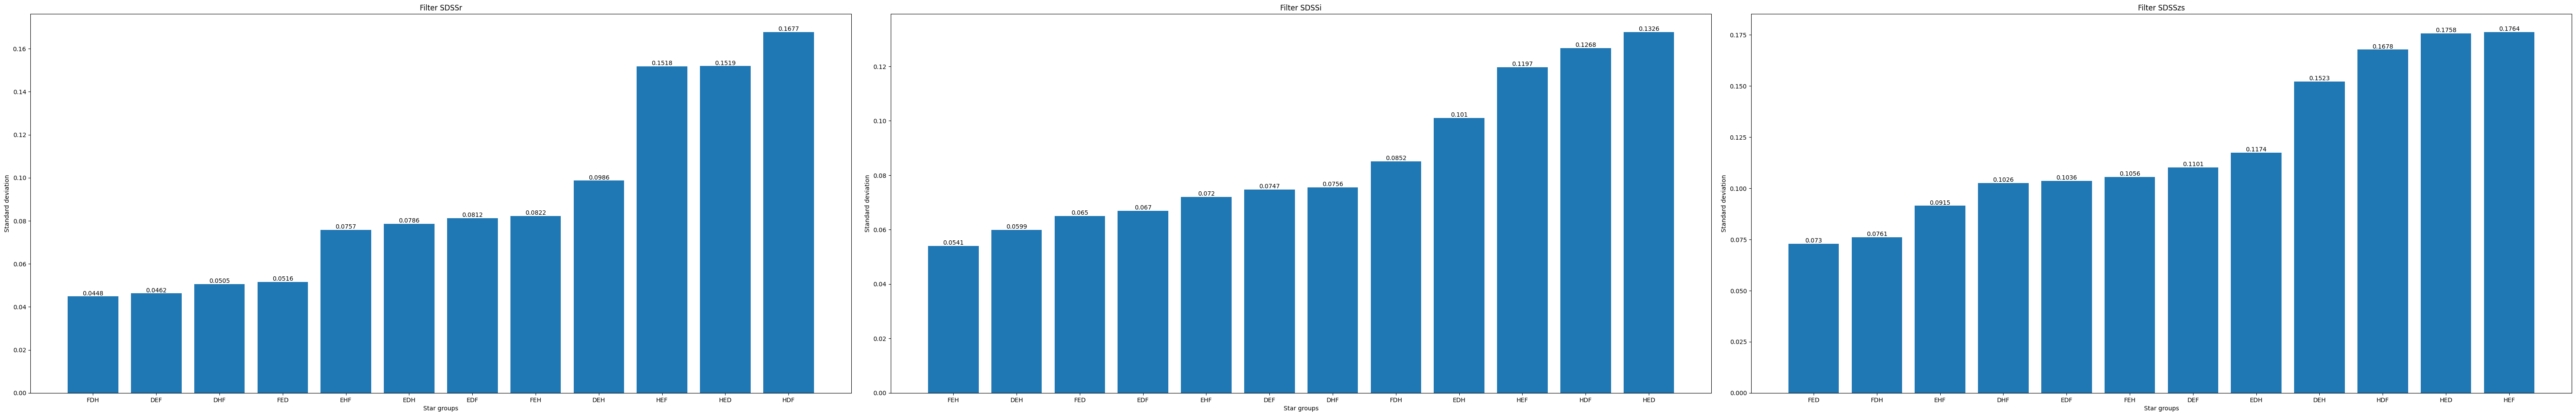

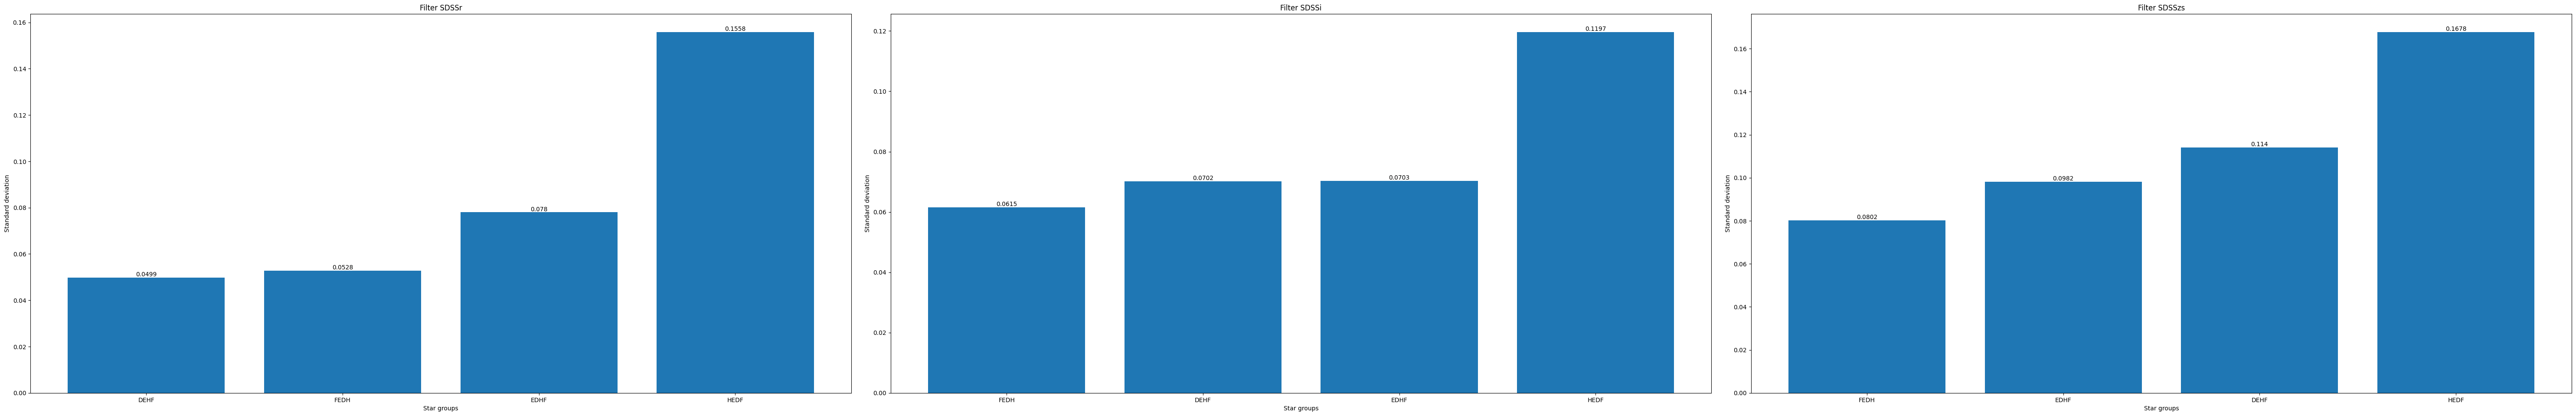

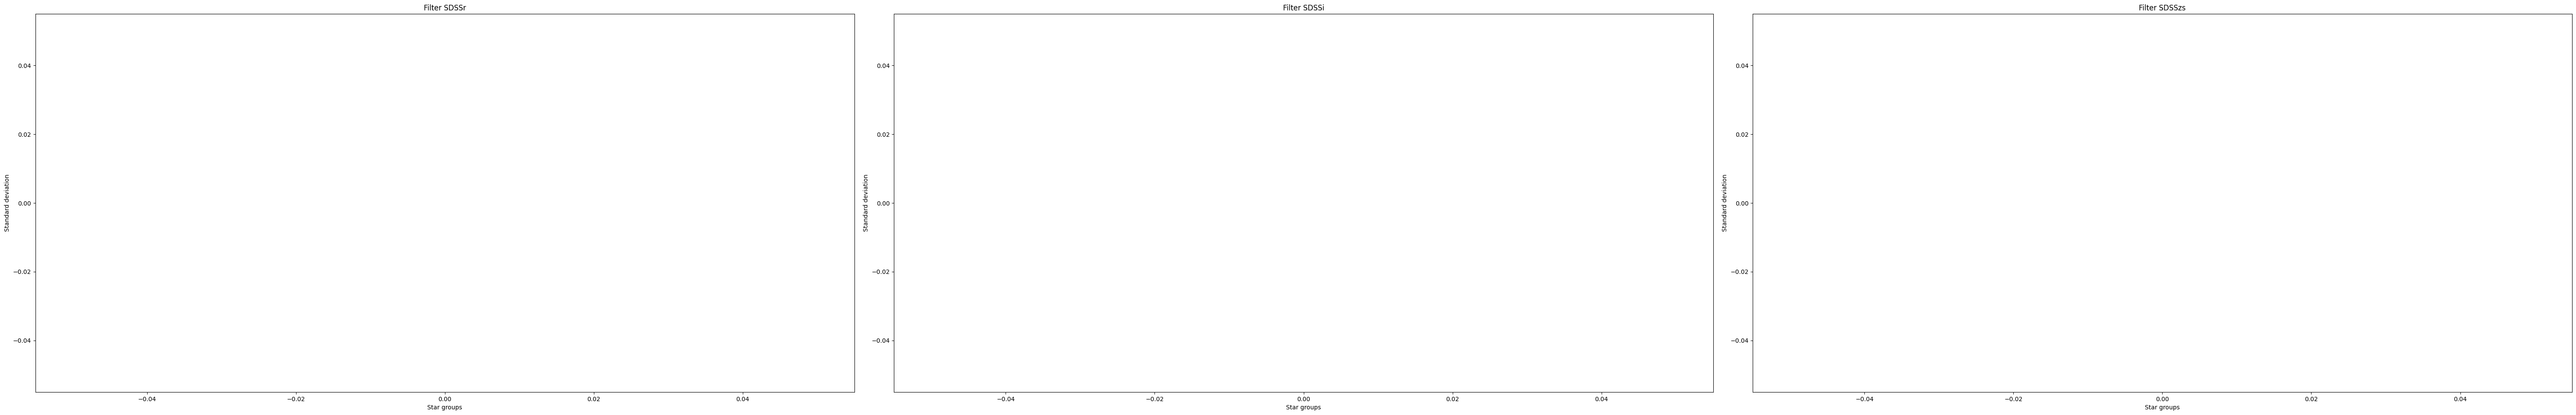

In [75]:
import copy
diff_phot_dates2 = copy.deepcopy(diff_phot_dates)
for o, t in enumerate(diff_phot):
    std2=[]
    stdpercentile2=[]
    combos2sorted=[]
    for i, filters in enumerate(diff_phot[t]):
        if i!=0:
            stdinter=[]
            stdpercentileinter=[]
            #count=0
            for j, combo in enumerate(diff_phot[t][filters]):
                deletepositions2=[]
                # for o, l in enumerate(np.logical_not(np.isnan(combo))):
                    # if l == np.bool_(False):
                        # diff_phot_dates2[t][filters][j] = np.delete(diff_phot_dates2[t][filters][j], o)

                combo=(combo)[np.logical_not(np.isnan(combo))]    

                for k in combo:
                    if k < np.quantile(combo, 0.1) or k > np.quantile(combo, 0.9):     
                        deletepositions2.append(np.where(combo == k)[0][0])  
                combo = np.delete(combo, deletepositions2)
                # diff_phot_dates2[t][filters][j] = np.delete(diff_phot_dates2[t][filters][j], deletepositions2)
                
                stdinter.append(np.std(combo))
                stdpercentileinter.append(np.std(combo))
                #count+=1
            sortered = sorted(zip(stdpercentileinter,stdinter,diff_phot_names[t][filters]))

            std2.append([x[1] for x in sortered])
            stdpercentile2.append([x[0] for x in sortered])
            combos2sorted.append([x[2] for x in sortered])

    figure, axis = plt.subplots(1, len(stdpercentile2),figsize=(60, 10))
    figure.tight_layout(pad=3.5)
    for i in range(len(stdpercentile2)):

        #bars=axis[i].bar(combos3sorted[i], stdpercentile[i])
        roundvalues=[round(val, 4) for val in stdpercentile2[i]]
        axis[i].bar_label(axis[i].bar(combos2sorted[i], stdpercentile2[i]), labels = roundvalues)
        axis[i].set(xlabel='Star groups', ylabel='Standard deviation')
        axis[i].set_title("Filter "+ unique_values[i+1])
        
    #plt.savefig('standarddeviation_astroDB'+str(t)+'.png')